<a href="https://colab.research.google.com/github/shezta/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-8/blob/main/Studi%20Kasus%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [388]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [389]:
!wget P https://raw.githubusercontent.com/shezta/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-8/main/Case-Study-02-MixITup.csv

--2022-10-12 03:31:32--  http://p/
Resolving p (p)... failed: Name or service not known.
wget: unable to resolve host address ‘p’
--2022-10-12 03:31:32--  https://raw.githubusercontent.com/shezta/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-8/main/Case-Study-02-MixITup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9248 (9.0K) [text/plain]
Saving to: ‘Case-Study-02-MixITup.csv.25’

Case-Study-02-MixIT 100%[===================>]   9.03K  --.-KB/s    in 0s      

2022-10-12 03:31:32 (89.4 MB/s) - ‘Case-Study-02-MixITup.csv.25’ saved [9248/9248]

FINISHED --2022-10-12 03:31:32--
Total wall clock time: 0.6s
Downloaded: 1 files, 9.0K in 0s (89.4 MB/s)


In [390]:
data = pd.read_csv("Case-Study-02-MixITup.csv", low_memory = False, encoding = "utf8")

In [391]:
data.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


#**Melihat Type Data**

In [392]:
print(type(data))
N,P = data.shape
print("Baris =",N, "Kolom =",P)

<class 'pandas.core.frame.DataFrame'>
Baris = 200 Kolom = 10


In [393]:
data.columns

Index(['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan',
       'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

#**Mengoreksi Type Data**

In [394]:
data.dtypes

ID                        int64
Jenis Kelamin            object
Umur                      int64
Pendapatan-per-bulan      int64
skor-pengeluaran          int64
Menikah                  object
Kota                     object
Promo                   float64
HariFav                  object
FavFlavor                 int64
dtype: object

In [395]:
data["Jenis Kelamin"] = data["Jenis Kelamin"].astype("category")
data["Kota"] = data["Kota"].astype("category")
data["HariFav"] = data["HariFav"].astype("category")
data["ID"] = data["ID"].astype("category")

In [396]:
data.dtypes

ID                      category
Jenis Kelamin           category
Umur                       int64
Pendapatan-per-bulan       int64
skor-pengeluaran           int64
Menikah                   object
Kota                    category
Promo                    float64
HariFav                 category
FavFlavor                  int64
dtype: object

#**Mengatasi Missing Value**

In [397]:
data.duplicated().sum()

0

In [398]:
data.isna().sum()

ID                       0
Jenis Kelamin            5
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 13
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

In [399]:
data.loc[data.Promo == 5]
data = data.drop(14)

In [400]:
data.loc[data.FavFlavor == 9]
data = data.drop(130)
data["FavFlavor"] = data["FavFlavor"].astype("category")

In [401]:
#Menghapus Variabel Menikah
data.drop("Menikah", axis = 1, inplace = True)
#Mengisi kolom Promo kosong dengan Modus
modus = data['Promo'].mode()[0]
data['Promo'] = data['Promo'].fillna(modus)

In [406]:
data.dropna(subset=["Jenis Kelamin"])[:5]
data.isna().sum()

TypeError: ignored

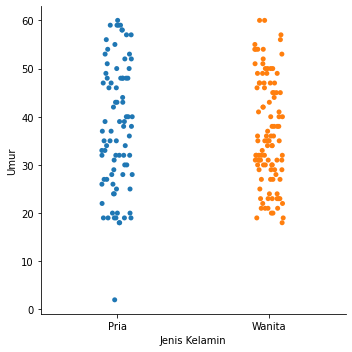

In [403]:
p = sns.catplot(x="Jenis Kelamin", y="Umur", data=data)

Dari scatterplot diatas bisa dilihat bahwa terdapat 1 outlier